# Table of all statistics 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stats = pd.read_csv("Sampling-1--main/Final_Stats.csv", sep = ",")
stats = stats.drop(stats.columns[0], axis=1)
stats.index = ['In degree', 'Out degree', 'WCC', 'SCC', 'Hop plot', 'Hop plot WCC', 'Clustering coefficient']

for c in stats.columns:
    df = pd.concat([stats[c].str.strip('[]').str.split(', ', expand=True)], axis=1, keys=stats.columns).astype(float)
    stats[c] = df.mean(axis=1)
    
stats.loc['Average_D'] = stats.mean()

### At 5% 

In [3]:
stats.iloc[0:8,0:4]

,RW5%,RNE5%,FF5%,RN5%
In degree,0.424077,0.648199,0.260670,0.508704
Out degree,0.544072,0.887574,0.267488,0.653541
WCC,0.408965,0.488094,0.992000,0.493153
SCC,0.493323,0.991111,0.594725,0.929778
Hop plot,355522.800000,645.000000,319914.800000,1857.400000
Hop plot WCC,48365.400000,0.000000,44873.000000,119.600000
Clustering coefficient,0.009015,0.006553,0.006966,0.011749
Average_D,57698.582779,92.574504,52112.845978,282.799561


### At 10% 

In [4]:
stats.iloc[0:8,4:8]

,RW10%,RNE10%,FF10%,RN10%
In degree,0.400715,0.629156,0.182130,0.432971
Out degree,0.529540,0.875996,0.298850,0.578661
WCC,0.333984,0.427612,0.892000,0.399329
SCC,0.420531,0.989333,0.510739,0.863937
Hop plot,828038.400000,3044.000000,733568.400000,9020.800000
Hop plot WCC,120339.600000,0.000000,96576.200000,1241.400000
Clustering coefficient,0.005855,0.006006,0.005119,0.008967
Average_D,135482.812946,435.275443,118592.355548,1466.354838


### At 15% 

In [5]:
stats.iloc[0:8,8:12]

,RW15%,RNE15%,FF15%,RN15%
In degree,3.839254e-01,0.617309,1.776910e-01,0.387463
Out degree,5.197754e-01,0.863327,3.049243e-01,0.476377
WCC,3.156266e-01,0.353965,3.678316e-01,0.383956
SCC,3.912156e-01,0.988444,3.622755e-01,0.745627
Hop plot,1.332207e+06,8174.800000,1.180266e+06,23757.800000
Hop plot WCC,2.301276e+05,0.000000,1.171042e+05,6779.200000
Clustering coefficient,4.317865e-03,0.003939,3.840246e-03,0.007280
Average_D,2.231909e+05,1168.232426,1.853387e+05,4362.714386


### At 20% 

In [6]:
stats.iloc[0:8,12:16]

,RW20%,RNE20%,FF20%,RN20%
In degree,3.690483e-01,0.603855,1.870641e-01,0.352763
Out degree,5.084404e-01,0.849936,3.120311e-01,0.444548
WCC,3.020832e-01,0.297785,3.091189e-01,0.355179
SCC,3.415516e-01,0.985778,3.095128e-01,0.632281
Hop plot,1.867433e+06,16713.000000,1.416078e+06,51894.200000
Hop plot WCC,3.477464e+05,1.200000,1.331526e+05,19442.200000
Clustering coefficient,2.883761e-03,0.003020,4.118420e-03,0.003643
Average_D,3.164544e+05,2388.134339,2.213188e+05,10191.169773


# Sample size vs. D-statistic graphs

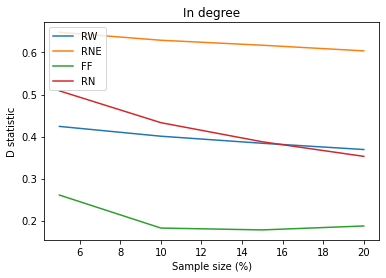

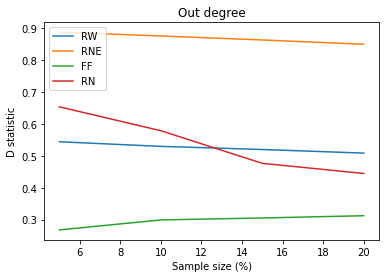

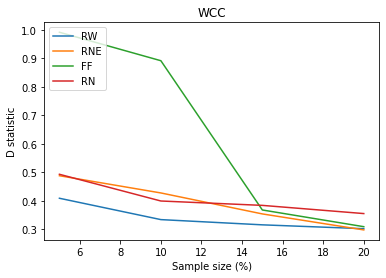

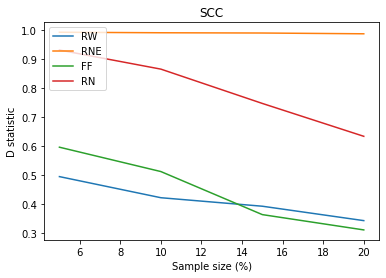

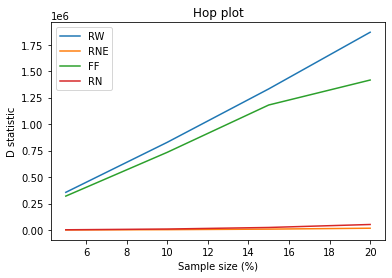

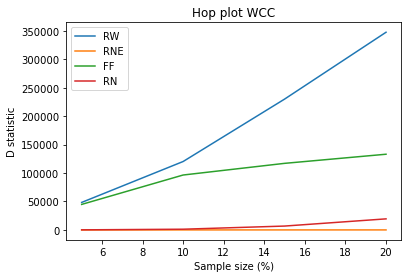

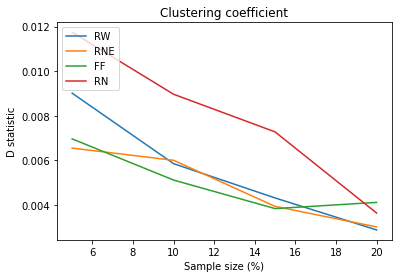

In [8]:
evals = ['In degree', 'Out degree', 'WCC', 'SCC', 'Hop plot', 'Hop plot WCC', 'Clustering coefficient']

for r in range(0,7):
    
    df = pd.DataFrame(index = ['RW', 'RNE', 'FF', 'RN'])

    for x in range(0,4):
        temp = stats.iloc[r, x*4:x*4+4]
        temp.index = df.index
        df = pd.concat([temp, df], axis=1, ignore_index=True)

    df.loc['Sample size'] = [20, 15, 10, 5]
    df = df.transpose()

    df.plot(x='Sample size', y=['RW', 'RNE', 'FF', 'RN'])
    plt.title(evals[r])
    plt.xlabel('Sample size (%)')
    plt.ylabel('D statistic')
    plt.legend(loc='upper left')